# Retail & Student Analytics Dashboard

## 📌 Project Objective
This project integrates multiple datasets to perform end-to-end data analysis.

## Objectives:
- Analyze retail sales data for business insights  
- Analyze student marks for academic performance insights  
- Use Python, NumPy, Pandas, Matplotlib, and Seaborn  
- Apply statistical analysis and data visualization  
- Build a combined analytics dashboard  

## 📂 Datasets Used
1. **sales_data.csv** — Retail sales dataset  
2. **student_Marks.csv** — Student performance dataset  


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

sales_df = pd.read_csv("/content/sales_data.csv", encoding='latin1')
student_df = pd.read_csv("/content/Student_Marks.csv")

sales_df.head()
student_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


##Sales Data Analysis

###Data Preparation

In [42]:
# Convert ORDERDATE to datetime
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'],
                                       format='mixed', dayfirst=True)

# Extract Year & Month
sales_df['Year'] = sales_df['ORDERDATE'].dt.year
sales_df['Month'] = sales_df['ORDERDATE'].dt.month

###KPI Calculation

In [43]:
total_sales = sales_df['SALES'].sum()
avg_order_value = sales_df['SALES'].mean()
total_orders = sales_df['ORDERNUMBER'].nunique()
total_customers = sales_df['CUSTOMERNAME'].nunique()

print("Total Sales:", total_sales)
print("Average Order Value:", avg_order_value)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)


Total Sales: 10032628.85
Average Order Value: 3553.889071909316
Total Orders: 307
Total Customers: 92


### Monthly Sales Trend

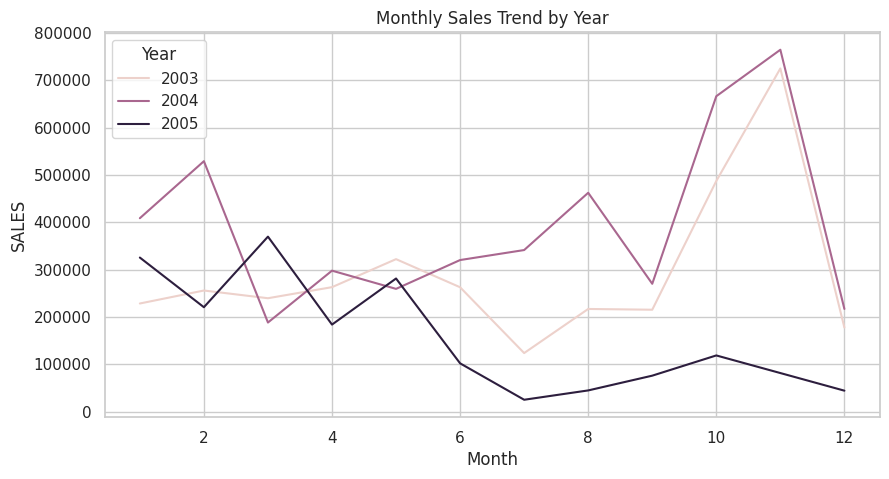

    Year  Month      SALES
0   2003      1  228402.12
1   2003      2  255820.01
2   2003      3  239553.11
3   2003      4  262919.85
4   2003      5  322093.48
5   2003      6  262714.93
6   2003      7  123712.40
7   2003      8  216856.04
8   2003      9  215252.17
9   2003     10  487145.52
10  2003     11  724876.86
11  2003     12  177633.05
12  2004      1  408558.96
13  2004      2  529004.91
14  2004      3  188190.26
15  2004      4  297767.09
16  2004      5  259299.29
17  2004      6  320196.00
18  2004      7  341302.79
19  2004      8  462275.71
20  2004      9  270032.32
21  2004     10  666233.06
22  2004     11  764397.44
23  2004     12  216904.77
24  2005      1  325435.63
25  2005      2  220558.89
26  2005      3  369626.89
27  2005      4  183851.12
28  2005      5  281205.00
29  2005      6  102007.82
30  2005      7   25088.10
31  2005      8   44790.01
32  2005      9   75961.16
33  2005     10  118688.73
34  2005     12   44273.36


In [44]:
monthly_sales = sales_df.groupby(['Year','Month'])['SALES'].sum(
    ).reset_index()

sns.lineplot(x='Month', y='SALES', hue='Year', data=monthly_sales)
plt.title("Monthly Sales Trend by Year")
plt.show()
print(monthly_sales)

###Sales by Product Line

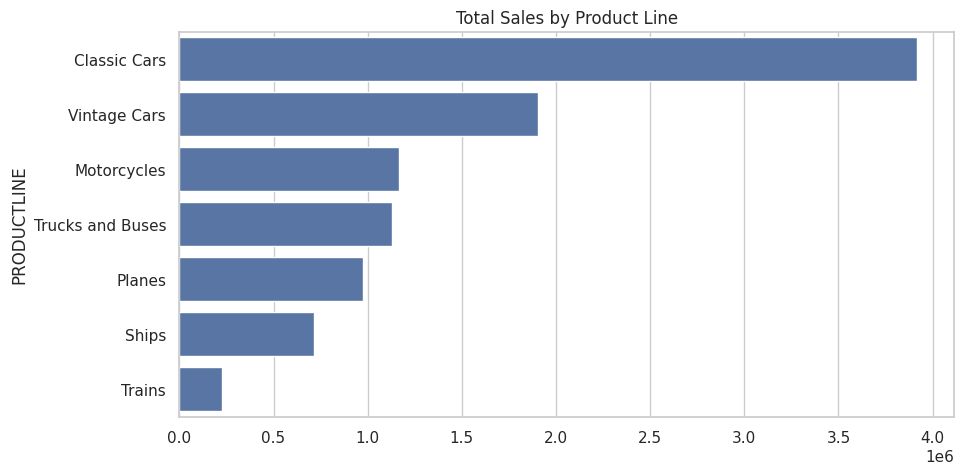

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


In [45]:
product_sales = sales_df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title("Total Sales by Product Line")
plt.show()
print(product_sales)

###Correlation Heatmap

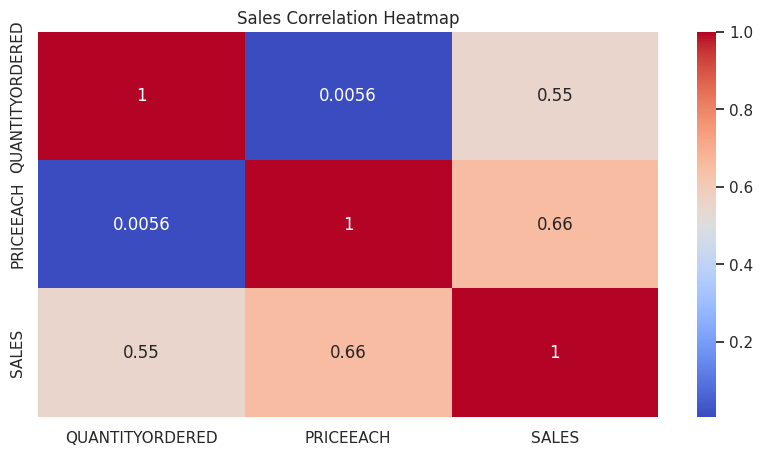

                 QUANTITYORDERED  PRICEEACH     SALES
QUANTITYORDERED         1.000000   0.005564  0.551426
PRICEEACH               0.005564   1.000000  0.657841
SALES                   0.551426   0.657841  1.000000


In [46]:
sns.heatmap(
    sales_df[['QUANTITYORDERED','PRICEEACH','SALES']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Sales Correlation Heatmap")
plt.show()
print(sales_df[['QUANTITYORDERED','PRICEEACH','SALES']].corr())

##Student Marks Analysis

###Distribution of Marks

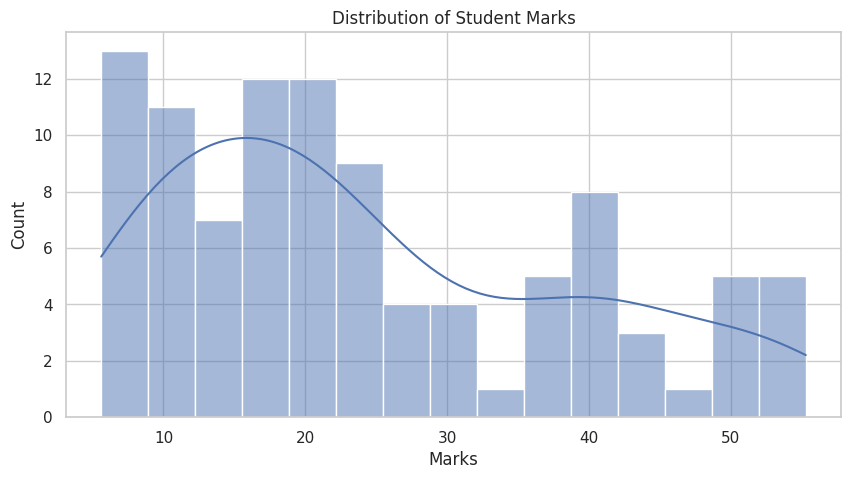

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64


In [47]:
sns.histplot(student_df['Marks'], bins=15, kde=True)
plt.title("Distribution of Student Marks")
plt.show()
print(student_df['Marks'])

###Study Time vs Marks

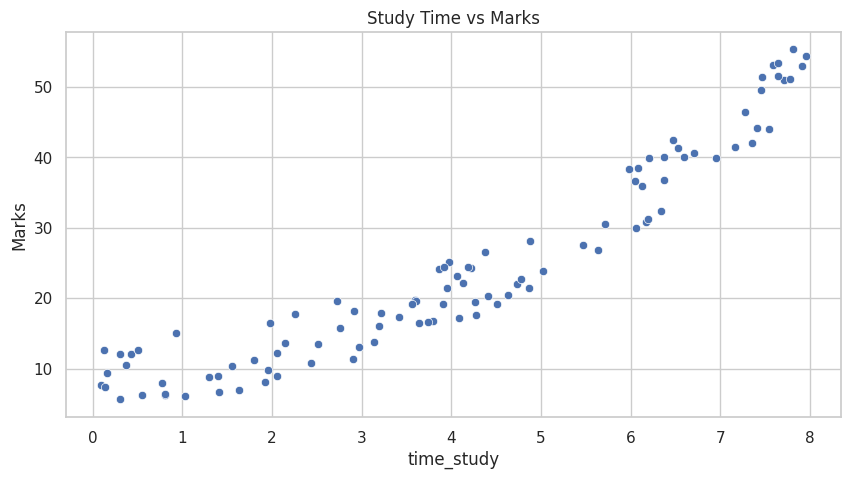

    time_study   Marks
0        4.508  19.202
1        0.096   7.734
2        3.133  13.811
3        7.909  53.018
4        7.811  55.299
..         ...     ...
95       3.561  19.128
96       0.301   5.609
97       7.163  41.444
98       0.309  12.027
99       6.335  32.357

[100 rows x 2 columns]


In [48]:
sns.scatterplot(x='time_study', y='Marks', data=student_df)
plt.title("Study Time vs Marks")
plt.show()
print(student_df[['time_study','Marks']])

###Regression Analysis

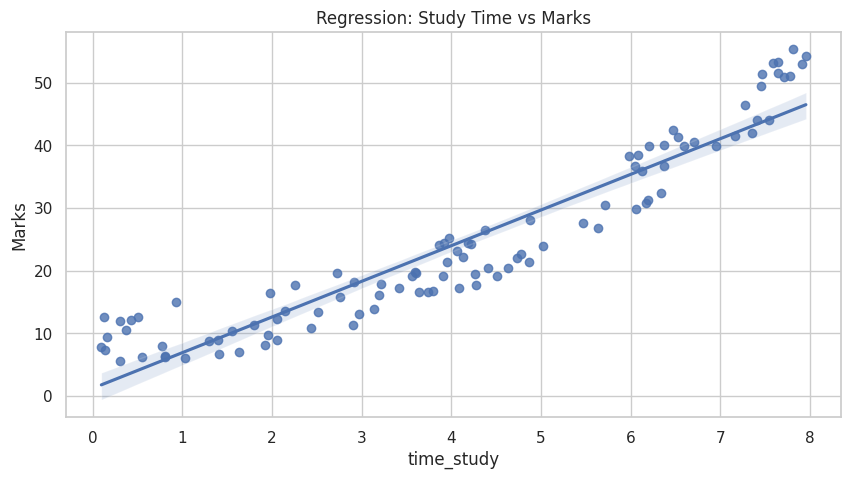

    time_study   Marks
0        4.508  19.202
1        0.096   7.734
2        3.133  13.811
3        7.909  53.018
4        7.811  55.299
..         ...     ...
95       3.561  19.128
96       0.301   5.609
97       7.163  41.444
98       0.309  12.027
99       6.335  32.357

[100 rows x 2 columns]


In [49]:
sns.regplot(x='time_study', y='Marks', data=student_df)
plt.title("Regression: Study Time vs Marks")
plt.show()
print(student_df[['time_study','Marks']])

###Number of Courses vs Marks

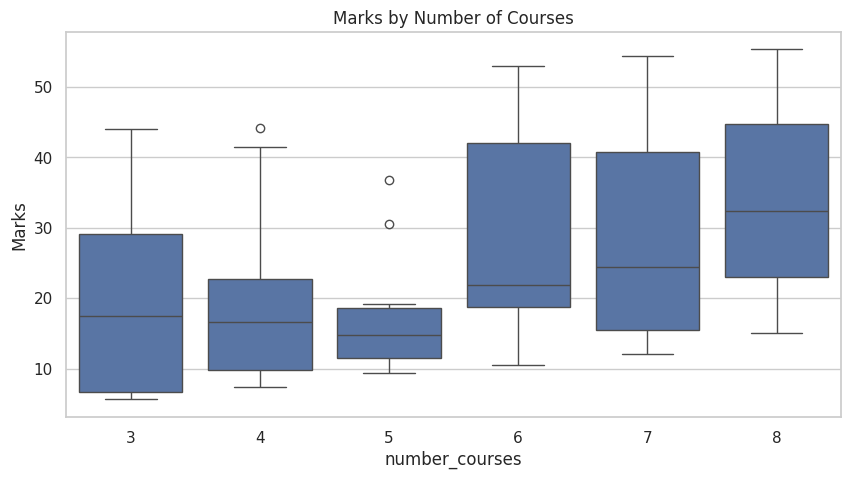

    number_courses   Marks
0                3  19.202
1                4   7.734
2                4  13.811
3                6  53.018
4                8  55.299
..             ...     ...
95               6  19.128
96               3   5.609
97               4  41.444
98               7  12.027
99               3  32.357

[100 rows x 2 columns]


In [50]:
sns.boxplot(x='number_courses', y='Marks', data=student_df)
plt.title("Marks by Number of Courses")
plt.show()
print(student_df[['number_courses','Marks']])

###Correlation Heatmap

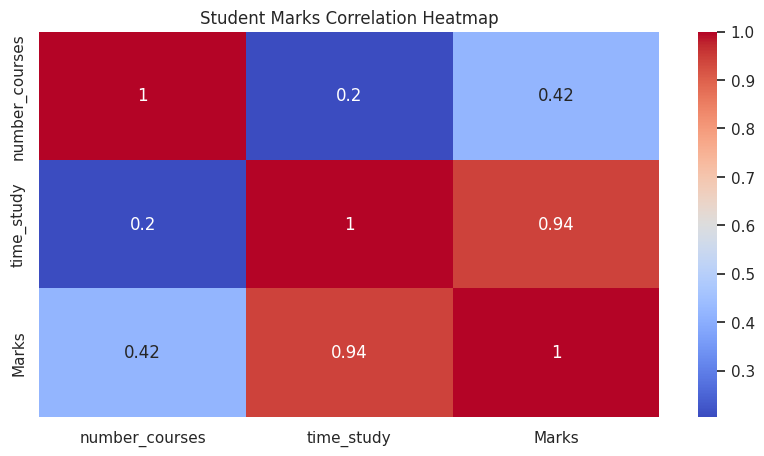

                number_courses  time_study     Marks
number_courses        1.000000    0.204844  0.417335
time_study            0.204844    1.000000  0.942254
Marks                 0.417335    0.942254  1.000000


In [51]:
sns.heatmap(student_df.corr(), annot=True, cmap='coolwarm')
plt.title("Student Marks Correlation Heatmap")
plt.show()
print(student_df.corr())

##  Key Insights

###  Retail Sales Insights
- **Total Sales:** ₹10.03M from **307 orders** and **92 customers**
- High **Average Order Value (₹3,553)** indicates bulk or premium purchases
- **Peak sales in Oct–Nov** show strong seasonality (festive/year-end demand)
- **Classic Cars** contribute the highest revenue (~39% of total sales)
- Sales correlate more with **price (0.66)** than quantity (0.55), supporting a premium pricing strategy

---

###  Student Performance Insights
- Student marks show wide variation (approx. **5–55**)
- **Study time has a very strong correlation with marks (0.94)**
- Number of courses has only a **moderate impact (0.42)** on performance
- Taking more courses does not guarantee higher marks

---

###  Combined Insight
Focused effort drives better outcomes:
- Premium pricing > higher sales volume
- Focused study time > more courses

---

## ✅ Summary
- Performed end-to-end analysis on retail and student datasets
- Calculated KPIs, trends, and correlations
- Visualized insights using Matplotlib and Seaborn
- Demonstrated real-world data analytics and dashboard skills

**Tools Used:** Python, NumPy, Pandas, Matplotlib, Seaborn  
